In [5]:
##lendo os dados 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float.format',"{:.2f}".format)
dados_viagem = "/home/joao/Estudos_py_ml/analise_de_dados/projeto_pandas_governo/2023_Viagem.csv"

df_viagens = pd.read_csv(dados_viagem, encoding="Windows-1252", sep=";", decimal=",")

##craiando coluna de despesas 
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]


##tratando dados nulos, como são muitos dados, ao inves de tirar, resolvi marcar como nao identificado na coluna Cargo 
df_viagens['Cargo'] = df_viagens['Cargo'].fillna("NÃO IDENTIFICADO")
df_viagens

#convertendo colunas de datas 
df_viagens["Período - Data de início"]  = pd.to_datetime(df_viagens["Período - Data de início"], dayfirst=True)
df_viagens["Período - Data de fim"]  = pd.to_datetime(df_viagens["Período - Data de fim"], dayfirst=True)

##criando novas colunas de data 
df_viagens["Mes da viagem"] = df_viagens["Período - Data de início"].dt.month_name()

df_viagens["dias de viagem"] =  (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days





In [6]:
# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_media=('dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
    )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False)
)

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos.columns = ['Cargo', 'proportion']
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)


In [ ]:
df_viagens

In [ ]:
df_final

Text(0.5, 0, 'Despesa média')

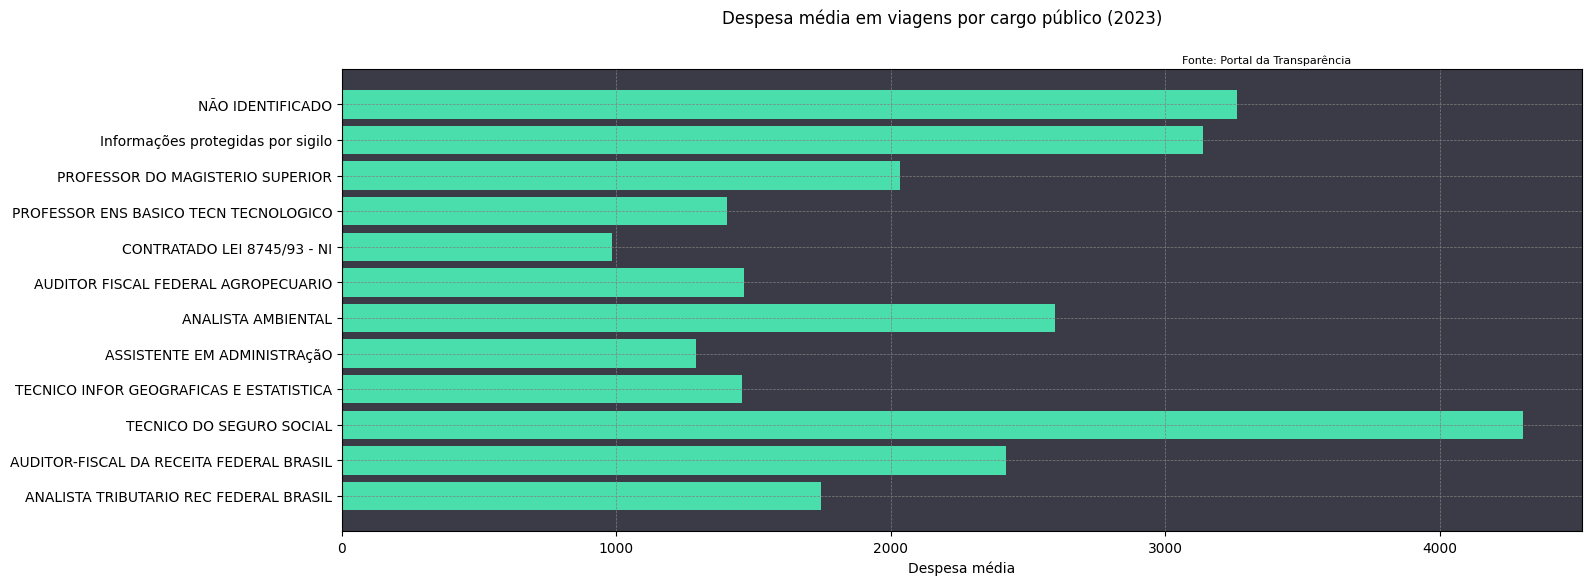

In [9]:
import matplotlib.pyplot as plt

#criacao de figura 
fig, ax = plt.subplots(figsize=(16, 6))

#plotando o grafico 
ax.barh(df_final['Cargo'], df_final['despesa_media'], color="#49deac")
ax.invert_yaxis()

##ajustando o grafico

ax.set_facecolor('#3b3b47')
fig.suptitle('Despesa média em viagens por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=10)
plt.xlabel('Despesa média')
